--
--
--
--
--
--
--
--
--
--
--
--
final 14,W1594 {'Alpha': 'red', 'Beta': 'red', 'Gamma': 'red'}


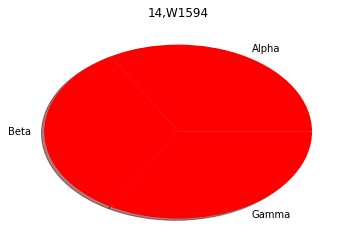

final 14,W4449 {'Alpha': 'g', 'Beta': 'g', 'Gamma': 'g'}


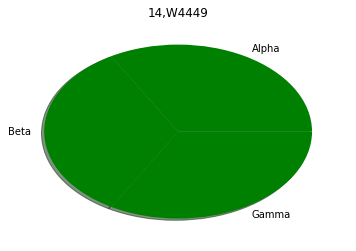

final 15,W1594 {'Alpha': 'red', 'Beta': 'g', 'Gamma': 'g'}


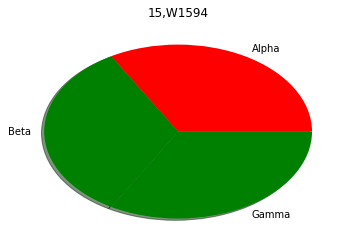

final 15,W4449 {'Alpha': 'g', 'Beta': 'g', 'Gamma': 'g'}


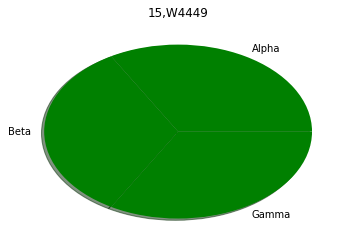

In [5]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

excel_file = '/rong/0423.xlsx'
xl = pd.read_excel(excel_file)

df = pd.DataFrame(xl )
weeks = []


for i in xl.index:
    dt = pd.to_datetime(xl['Day'][i])
    s = dt.strftime("%U")
    weeks.append( s)

df['week'] = weeks


sites = df['eNodeB Site'].unique()
sectors = df['eCell Sector'].unique()
weeks_n = df['week'].unique()
threhold = [0.05,0.1,0.2,1]

final_data_map = {}
final_color_map = {}

n_r = 0
n_y = 0
n_g = 0

for wk in weeks_n:
    for site in sites:
        sector_data_map = {}
        sector_color_map = {}
        for sector in sectors:
            threhold_count = df[ (df['eNodeB Site']==site) & (df['eCell Sector']==sector) &( df['week']==wk ) ].shape[0]
            threhold_count1 = df[ (df['eNodeB Site']==site) & (df['eCell Sector']==sector) &( df['week']==wk ) & ( df['PRB Uti'] <0.75)].shape[0]
            threhold_count2 = df[ (df['eNodeB Site']==site) & (df['eCell Sector']==sector) &( df['week']==wk ) 
                                 & ( df['PRB Uti'] <0.8) & ( df['PRB Uti'] >=0.75)].shape[0]
            threhold_count3 = df[ (df['eNodeB Site']==site) & (df['eCell Sector']==sector) &( df['week']==wk ) & ( df['PRB Uti'] >0.8)].shape[0]
            lt = [threhold_count,threhold_count1,threhold_count2,threhold_count3]
            sector_data_map[sector] = lt
            if(threhold_count3 >0):
                sector_color_map[sector] = 'red'
                n_r +=1
            elif(threhold_count2/threhold_count>0.04):
                sector_color_map[sector] = 'y'
                n_y +=1
            else:
                sector_color_map[sector] = 'g'
                n_g +=1
            for th in threhold:
                n =df[ (df['eNodeB Site']==site) & (df['eCell Sector']==sector) &( df['week']==wk )& ( df['PRB Uti'] <th) ].shape
                #print( site, sector, wk, th, n)
        final_data_map[wk+','+site] = sector_data_map
        final_color_map[wk+','+site] = sector_color_map
                
#取每个分组，同一周的三个值
for key,value in final_data_map.items():
    # Data to plot
    #print("final", key,value)
    for key_sector,value_sector in value.items():
        #print("---", key_sector, value_sector)
        print("--")
lte_lbl = ['Alpha','Beta','Gamma']
lte_clr = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

for key,value in final_color_map.items():
    # Data to plot
    print("final", key,value)
    
    explode = (0.1, 0, 0, 0)  # explode 1st slice
    y = [10,10,10]
    #plt.subplot(adddd )
    dd = value
    lte_clr[0] = dd[ sectors[0] ]
    lte_clr[1] = dd[ sectors[1] ]
    lte_clr[2] = dd[ sectors[2] ]
    
    plt.pie(y, labels=lte_lbl, colors=lte_clr,shadow=True)#autopct='%1.1f%%', 
   
    plt.title("pie")
  
    plt.title(key)
    plt.savefig(key + '.png')
    Image.open(key +'.png').save(key +'.png','png')
    plt.show()
    
    #for key_sector,value_sector in value.items():
        #print("---", key_sector, value_sector)
        #for num in value_sector:
        #    print("--------", num)

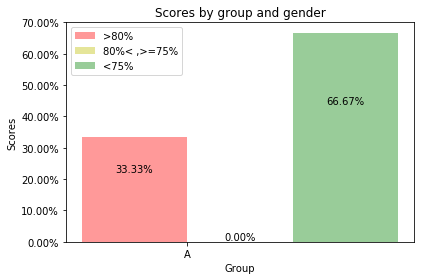

In [35]:
import numpy as np
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

n_week = 1
opacity = 0.4
index = np.arange(n_week)

n_rs =  np.array([n_r*1.0/(n_r+ n_y + n_g)])
n_ys = np.array([n_y*1.0/(n_r+ n_y + n_g)])
n_gs = np.array([n_g*1.0/(n_r+ n_y + n_g)])


fig, ax = plt.subplots()

rects1 = ax.bar(index, n_rs, bar_width,
                alpha=opacity, color='r',
                error_kw=error_config,
                label='>80%')
rects2 = ax.bar(index + bar_width, n_ys, bar_width,
                alpha=opacity, color='y',
                error_kw=error_config,
                label='80%< ,>=75%')
rects3 = ax.bar(index + bar_width*2, n_gs, bar_width,
                alpha=opacity, color='g',
                error_kw=error_config,
                label='<75%')
ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))

vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

ax.legend()


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()*100
        vvv = "%.2f" % height
        tx = str(vvv) + '%'
        ax.text(rect.get_x() + rect.get_width()/2., 0.65*rect.get_height(),
            tx, ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()


In [43]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=['a'],
    y=[23],
    name='SF Zoo'
)
trace2 = go.Bar(
    x=['b'],
    y=[12],
    name='LA Zoo'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')

PlotlyRequestError: Aw, snap! You tried to use our API as the user 'ehugr', but the supplied API key doesn't match our records. You can view your API key at plot.ly/settings.

You're most likely getting this message because your local credentials file isn't synced with the Plotly server you're communicating with.

Go to plot.ly/<language>/getting-started (e.g., plot.ly/python/getting-started) for more information.

Make sure that you're logged in as ehugr.

Need help? Please try searching Plotly's <a href='http://stackoverflow.com/questions/tagged/plotly'>Stack Overflow channel</a>.